In [10]:
from module_behavioral.dataloader import DataLoader
from module_behavioral.analysis import reduce_dimensions, emotion_colors

import numpy as np
from matplotlib import pyplot as plt


In [11]:
## load emotion and color data from experiment one
d = DataLoader(context=1, location='../data/behavioral/processeddata/1/')
d.load_color()
d.load_emotion()
d.load_emotion_color_association()

In [12]:
## reduce the similarity matrix to 2 dimensions
color_embedding = reduce_dimensions(d.average_color_matrix, 2)
emotion_embedding = reduce_dimensions(d.average_emotion_matrix, 2)

In [13]:
colors = emotion_colors(color_embedding, d.average_emotion_color_ranking_matrix, d.color_values)

In [14]:
## set matplotlib style
plt.style.use('./module_behavioral/figures.style')

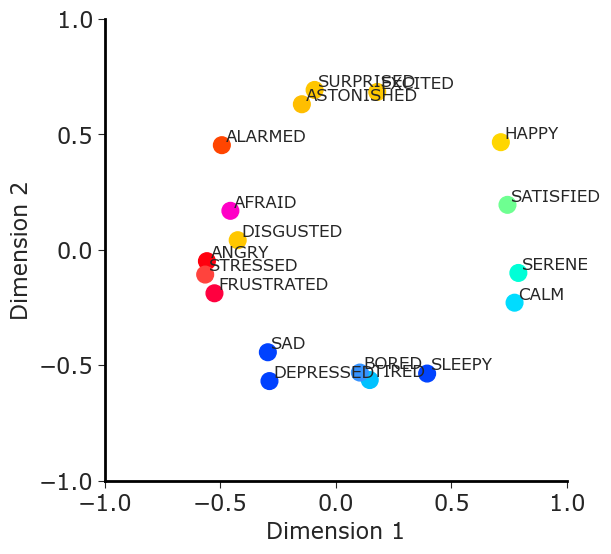

In [17]:
## Figure 2E.
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(emotion_embedding[:, 0], emotion_embedding[:, 1], c=colors)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

#annotate each point with emotion
ax.set_aspect('equal')
plt.locator_params(nbins=4)

for i in range(0, len(d.emotion)):
    x = d.emotion[i]
    plt.annotate(str(x),
                 (emotion_embedding[i, 0], emotion_embedding[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=12)
plt.savefig('../figures/2E.svg', dpi=600,bbox_inches='tight')